In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [2]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/GL-DSBA/AS-Proj1/SalaryData.csv")

In [3]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
#### Null hypo:Mean salary of all individuals are same at all 3 levels of education.
#### Alt.hypo: For atleast one level of education,mean salary of individuals are different.

#### Null hypo:Mean salary of all individuals are same at all 4 levels of Occupation.
#### Alt.hypo: For atleast one level of occupation,mean salary of individuals are different.

In [5]:
formula='Salary~C(Education)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

#### P value is less than 0.05 so we reject null hypothesis.

In [6]:
formula='Salary~C(Occupation)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

#### We fail to reject null hypothesis as P vale is greater than 0.05

In [7]:
df.Education=pd.Categorical(df.Education)
df.Occupation=pd.Categorical(df.Occupation)

<AxesSubplot:xlabel='Education', ylabel='Salary'>

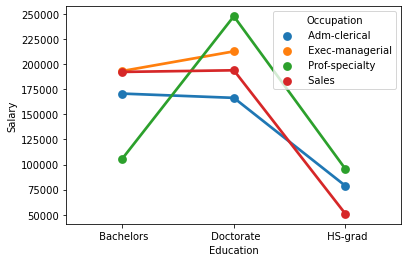

In [8]:
sns.pointplot(x='Education',y='Salary',hue='Occupation',data=df,ci=None)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

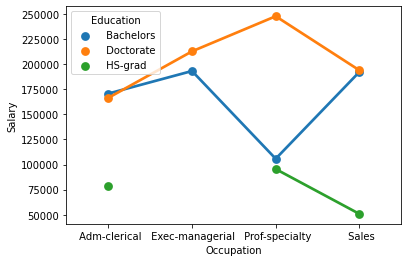

In [9]:
sns.pointplot(x='Occupation',y='Salary',hue='Education',data=df,ci=None)

In [10]:
formula='Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

#### We reject null hypothesis as the P value is less than alpha.

In [11]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/GL-DSBA/AS-Proj1/EducationPost12thStandard.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [14]:
df_pca = df.drop(['Names'], axis = 1)

In [15]:
df_pca.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [16]:
len(df_pca.columns)

17

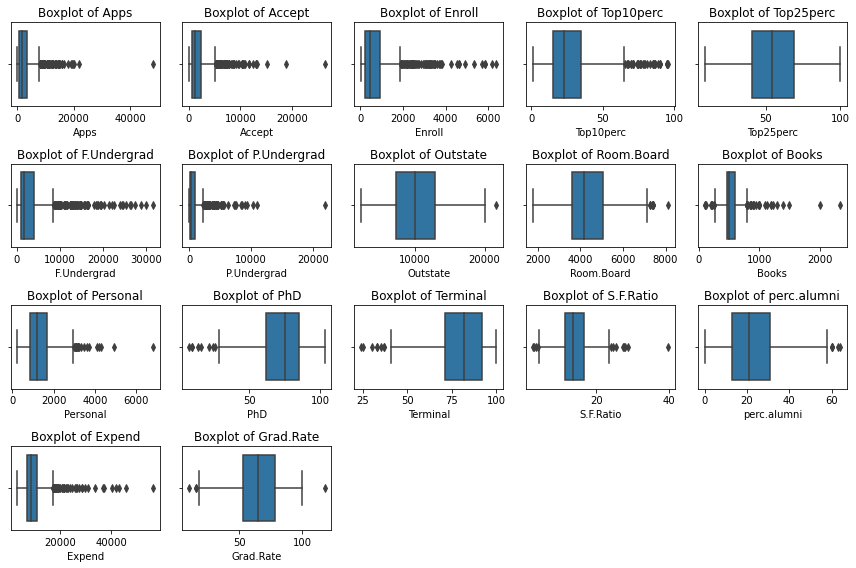

In [17]:
plt.figure(figsize = (12,8))
New_list = df_pca.columns
for i in range(len(New_list)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x = df_pca[New_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

In [18]:
df_pca.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [19]:
df_pca_scaled = df_pca.apply(zscore)

In [20]:
df_pca_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [21]:
df_pca_scaled.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   6.355797e-17  6.774575e-17 -5.249269e-17 -2.753232e-17 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.551337e-01 -7.947645e-01 -8.022728e-01 -1.506526e+00 -2.364419e+00   
25%   -5.754408e-01 -5.775805e-01 -5.793514e-01 -7.123803e-01 -7.476067e-01   
50%   -3.732540e-01 -3.710108e-01 -3.725836e-01 -2.585828e-01 -9.077663e-02   
75%    1.609122e-01  1.654173e-01  1.314128e-01  4.221134e-01  6.671042e-01   
max    1.165867e+01  9.924816e+00  6.043678e+00  3.882319e+00  2.233391e+00   

        F.Undergrad   P.Undergrad      Outstate    Room.Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.661405e-16 -3.029180e-17  6.515595e-17  3.570717e-16 -2.192583e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.346169e-01 -5.615022e-01 -2.014878e+00 -2.351778e+00 -2.747779e+00   
25%   -5.586426e-01 -4.997191e-01 -7.762035e-01 -6.939170e-01 -4.810994e-01   
50%   -4.111378e-01 -3.301442e-01 -1.120949e-01 -1.437297e-01 -2.992802e-01   
75%    6.294077e-02  7.341765e-02  6.179271e-01  6.318245e-01  3.067838e-01   
max    5.764674e+00  1.378992e+01  2.800531e+00  3.436593e+00  1.085230e+01   

           Personal           PhD      Terminal     S.F.Ratio   perc.alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.765243e-17  5.954768e-17 -4.481615e-16 -2.057556e-17 -6.022638e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.611860e+00 -3.962596e+00 -3.785982e+00 -2.929799e+00 -1.836580e+00   
25%   -7.251203e-01 -6.532948e-01 -5.915023e-01 -6.546598e-01 -7.868237e-01   
50%   -2.078552e-01  1.433889e-01  1.561419e-01 -1.237939e-01 -1.408197e-01   
75%    5.310950e-01  7.562224e-01  8.358184e-01  6.093067e-01  6.666852e-01   
max    8.068387e+00  1.859323e+00  1.379560e+00  6.499390e+00  3.331452e+00   

             Expend     Grad.Rate  
count  7.770000e+02  7.770000e+02  
mean   1.213101e-16  3.886495e-16  
std    1.000644e+00  1.000644e+00  
min   -1.240641e+00 -3.230876e+00  
25%   -5.574826e-01 -7.260193e-01  
50%   -2.458933e-01 -2.698956e-02  
75%    2.241735e-01  7.302926e-01  
max    8.924721e+00  3.060392e+00

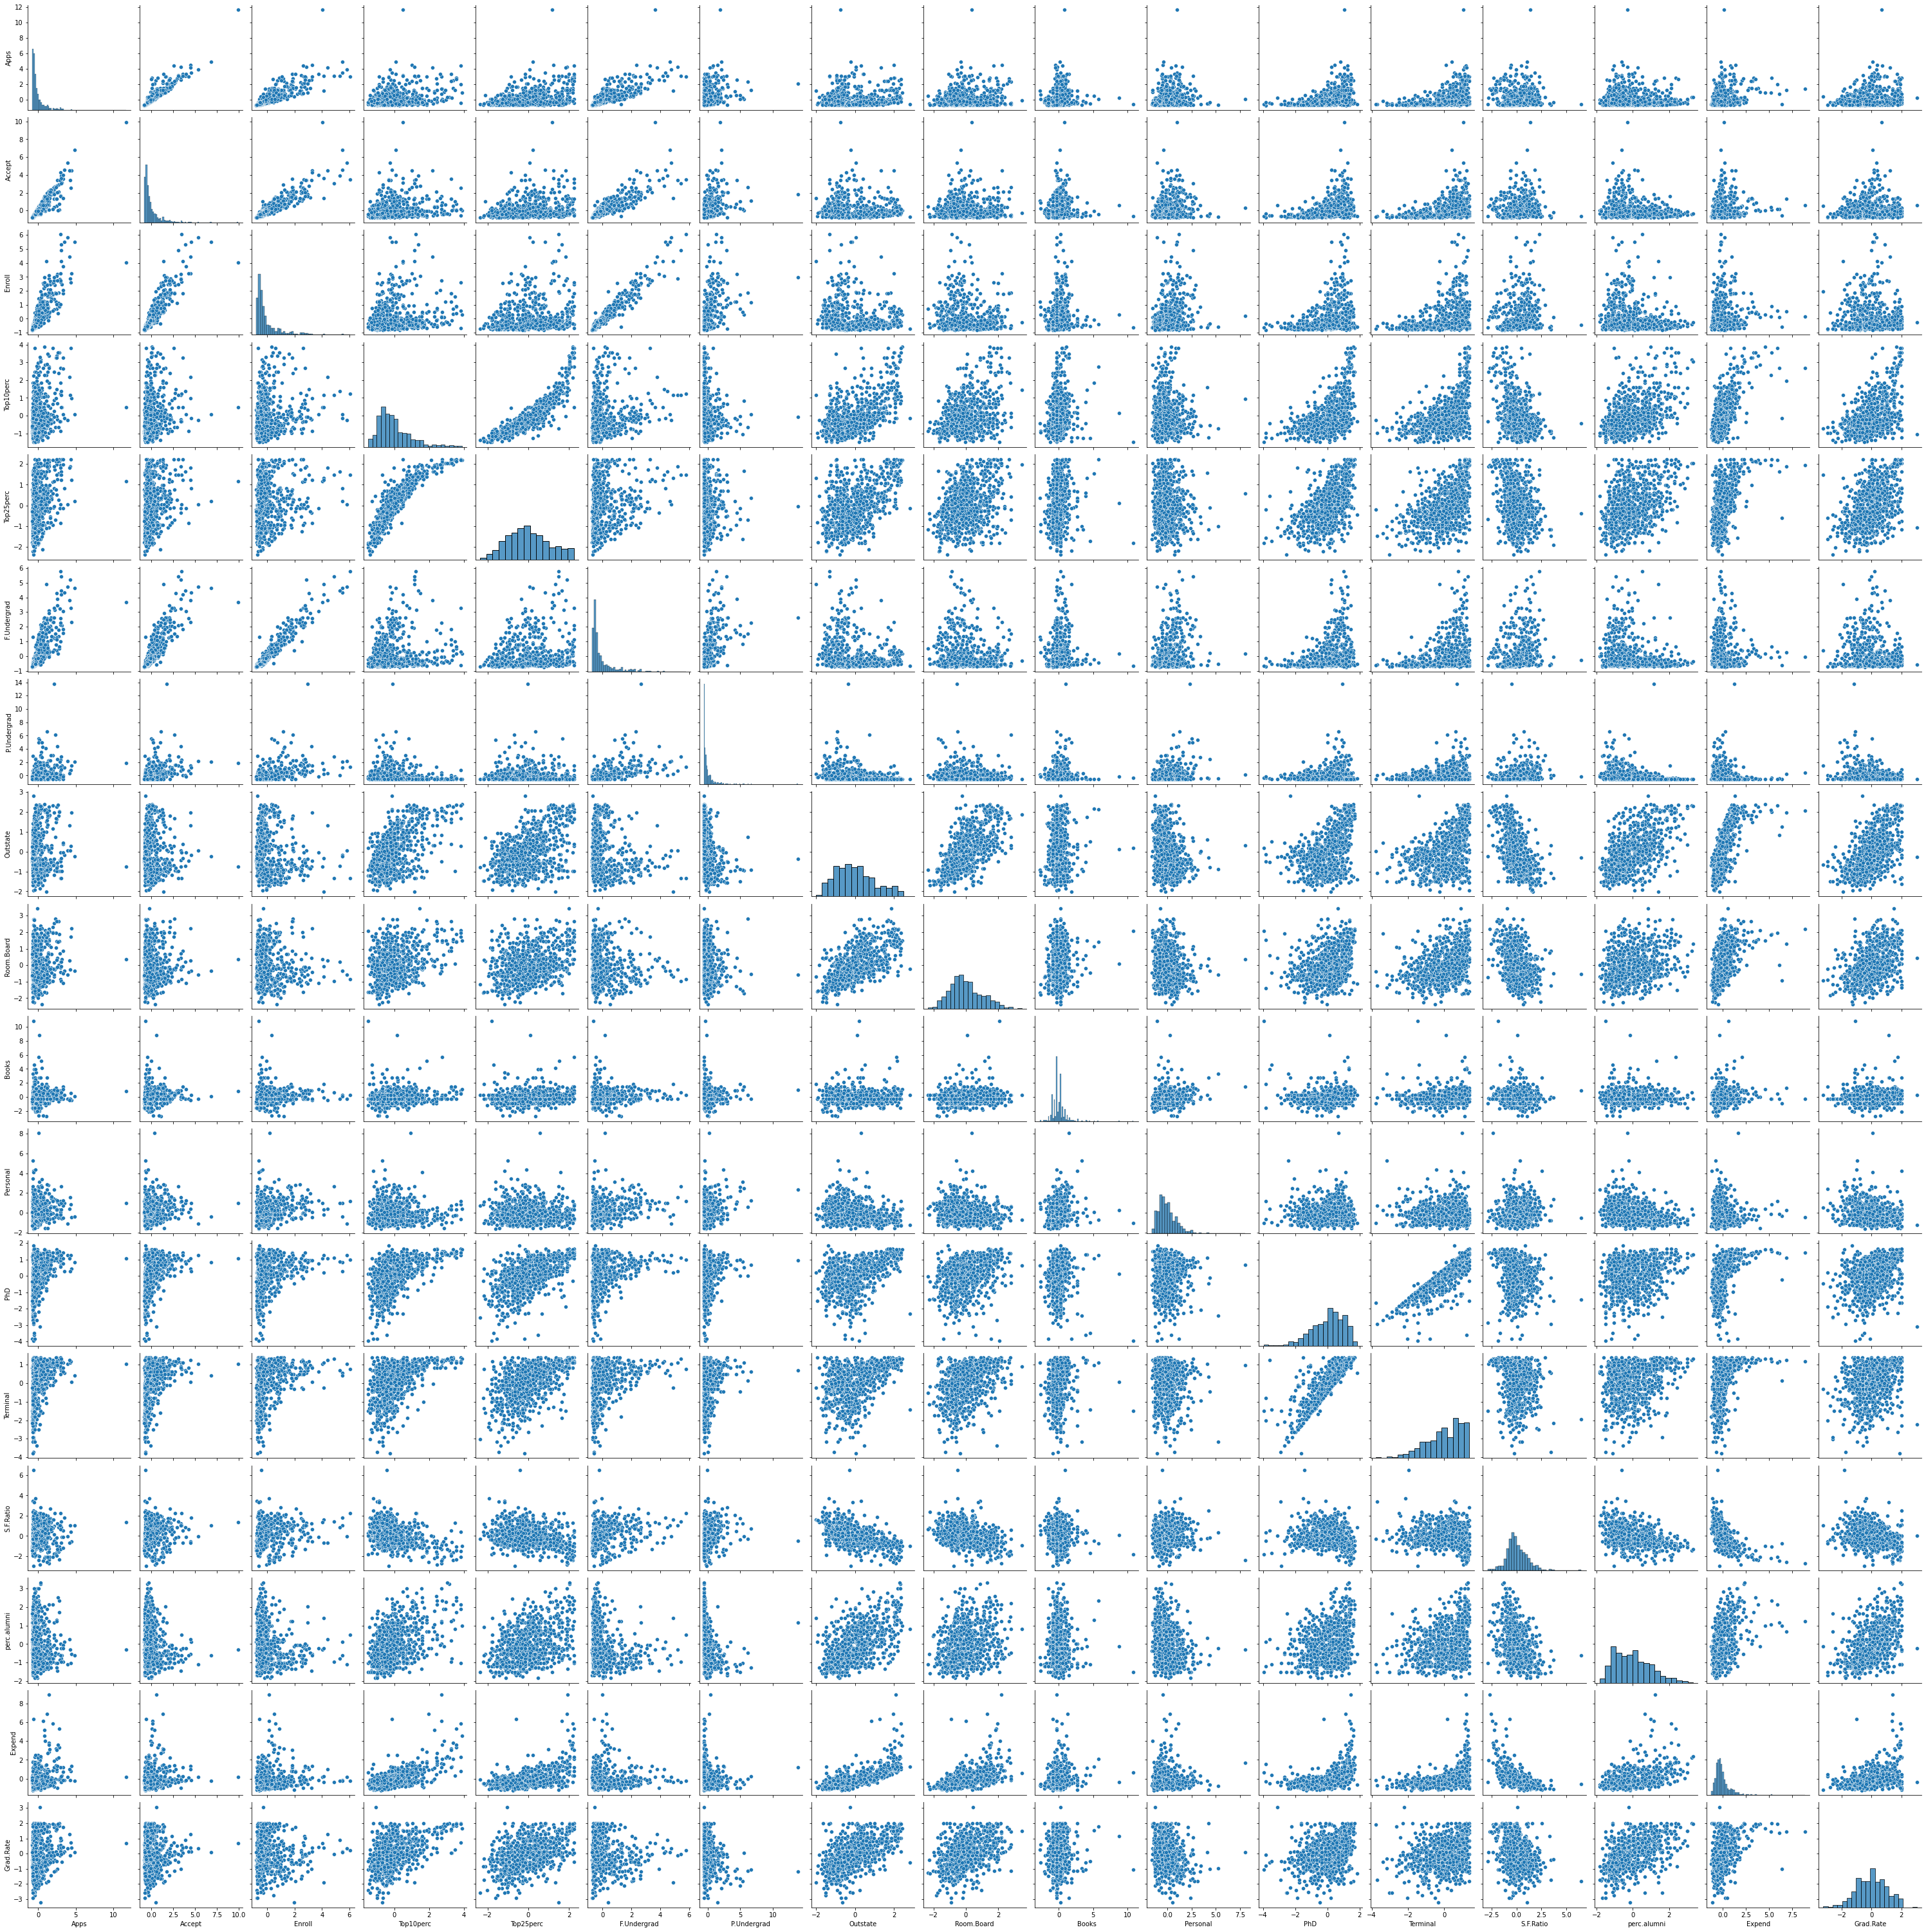

In [22]:
sns.pairplot(df_pca_scaled)
plt.show()

In [23]:
corr=df.corr()
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

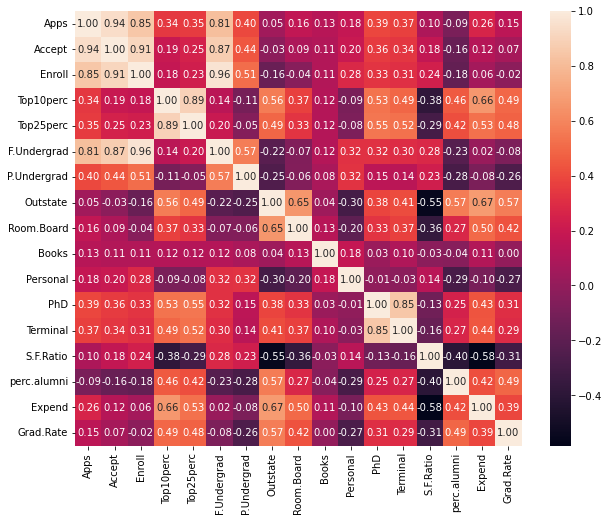

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(),annot=True,fmt='.2f');

In [25]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for i in New_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

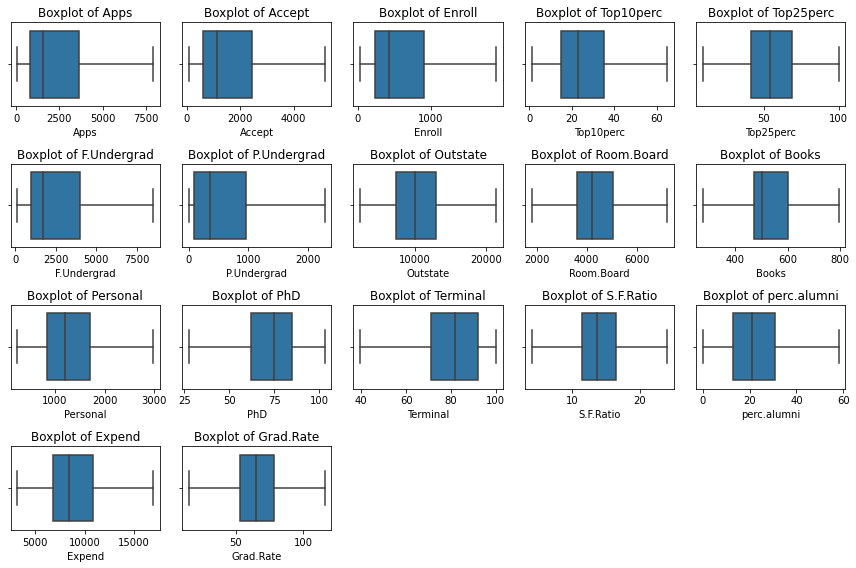

In [27]:
plt.figure(figsize = (12,8))
New_list = df_pca.columns
for i in range(len(New_list)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x = df_pca[New_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17,random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [29]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [30]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [31]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [32]:
df_export=pd.DataFrame(pca.components_,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'],index=df_pca_scaled.columns)

In [33]:
df_export

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.207602  0.176304  0.354274  0.344001  0.154641   
Accept       0.331598  0.372117  0.403724 -0.082412 -0.044779  0.417674   
Enroll      -0.063092 -0.101249 -0.082986  0.035056 -0.024148 -0.061393   
Top10perc    0.281311  0.267817  0.161827 -0.051547 -0.109767  0.100412   
Top25perc    0.005741  0.055786 -0.055694 -0.395434 -0.426534 -0.043454   
F.Undergrad -0.016237  0.007535 -0.042558 -0.052693  0.033092 -0.043454   
P.Undergrad -0.042486 -0.012950 -0.027693 -0.161332 -0.118486 -0.025076   
Outstate    -0.103090 -0.056271  0.058662 -0.122678 -0.102492  0.078890   
Room.Board  -0.090227 -0.177865 -0.128561  0.341100  0.403712 -0.059442   
Books        0.052510  0.041140  0.034488  0.064026  0.014549  0.020847   
Personal     0.043046 -0.058406 -0.069399 -0.008105 -0.273128 -0.081158   
PhD          0.024071 -0.145102  0.011143  0.038554 -0.089352  0.056177   
Terminal     0.595831  0.292642 -0.444638  0.001023  0.021884 -0.523622   
S.F.Ratio    0.080633  0.033467 -0.085697 -0.107828  0.151742 -0.056373   
perc.alumni  0.133406 -0.145498  0.029590  0.697723 -0.617275  0.009916   
Expend       0.459139 -0.518569 -0.404318 -0.148739  0.051868  0.560363   
Grad.Rate    0.358970 -0.543427  0.609651 -0.144986  0.080348 -0.414705   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps         0.026443  0.294736  0.249030  0.064758 -0.042529  0.318313   
Accept       0.315088 -0.249644 -0.137809  0.056342  0.219929  0.058311   
Enroll       0.139682  0.046599  0.148967  0.677412  0.499721 -0.127028   
Top10perc   -0.158558  0.131291  0.184996  0.087089 -0.230711 -0.534725   
Top25perc    0.302385  0.222532  0.560919 -0.127289 -0.222311  0.140166   
F.Undergrad -0.191199 -0.030000  0.162755  0.641055 -0.331398  0.091256   
P.Undergrad  0.061042  0.108529  0.209744 -0.149692  0.633790 -0.001096   
Outstate     0.570784  0.009846 -0.221453  0.213293 -0.232661 -0.077040   
Room.Board   0.560673 -0.004573  0.275023 -0.133663 -0.094469 -0.185182   
Books       -0.223106  0.186675  0.298324 -0.082029  0.136028 -0.123452   
Personal     0.100693  0.143221 -0.359322  0.031940 -0.018578  0.040372   
PhD         -0.063536 -0.823444  0.354560 -0.028159 -0.039264  0.023222   
Terminal     0.125998 -0.141856 -0.069749  0.011438  0.039455  0.127696   
S.F.Ratio    0.019286 -0.034012 -0.058429 -0.066849  0.027529 -0.691126   
perc.alumni  0.020952  0.038354  0.003402 -0.009439 -0.003090 -0.112056   
Expend      -0.052731  0.101595 -0.025929  0.002883 -0.012890  0.029808   
Grad.Rate    0.009018  0.050900  0.001146  0.000773 -0.001114  0.013813   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.317056 -0.176958  0.205082  0.318909  0.252316  
Accept       0.046429  0.246665 -0.246595 -0.131690 -0.169241  
Enroll      -0.066038 -0.289848 -0.146989  0.226744 -0.208065  
Top10perc   -0.519443 -0.161189  0.017314  0.079273  0.269129  
Top25perc    0.204720 -0.079388 -0.216297  0.075958 -0.109268  
F.Undergrad  0.154928  0.487046 -0.047340 -0.298119  0.216163  
P.Undergrad -0.028477  0.219259  0.243321 -0.226584  0.559944  
Outstate    -0.012161 -0.083605  0.678524 -0.054159 -0.005336  
Room.Board  -0.254938  0.274544 -0.255335 -0.049139  0.041904  
Books       -0.088578  0.472045  0.423000  0.132286 -0.590271  
Personal    -0.058973  0.445001 -0.130728  0.692089  0.219839  
PhD          0.016485 -0.011026  0.182661  0.325982  0.122107  
Terminal    -0.058313 -0.017715  0.104088 -0.093746 -0.069197  
S.F.Ratio    0.671009  0.041374 -0.027154  0.073123  0.036477  
perc.alumni  0.158910 -0.020899 -0.008418 -0.227742 -0.003394  
Expend      -0.027076 -0.021248  0.003334 -0.043880 -0.005008  
Grad.Rate    0.006209 -0.002222 -0.019187 -0.035310 -0.013071

In [34]:
round(df_export.PC1,2)

Apps           0.25
Accept         0.33
Enroll        -0.06
Top10perc      0.28
Top25perc      0.01
F.Undergrad   -0.02
P.Undergrad   -0.04
Outstate      -0.10
Room.Board    -0.09
Books          0.05
Personal       0.04
PhD            0.02
Terminal       0.60
S.F.Ratio      0.08
perc.alumni    0.13
Expend         0.46
Grad.Rate      0.36
Name: PC1, dtype: float64

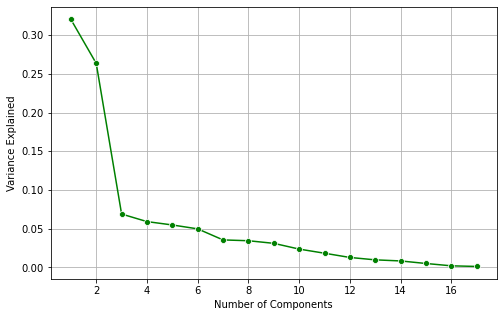

In [35]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o',color='green')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.grid()
plt.show()

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [37]:
df_selected = df_export[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7']]
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.207602  0.176304  0.354274  0.344001  0.154641   
Accept       0.331598  0.372117  0.403724 -0.082412 -0.044779  0.417674   
Enroll      -0.063092 -0.101249 -0.082986  0.035056 -0.024148 -0.061393   
Top10perc    0.281311  0.267817  0.161827 -0.051547 -0.109767  0.100412   
Top25perc    0.005741  0.055786 -0.055694 -0.395434 -0.426534 -0.043454   
F.Undergrad -0.016237  0.007535 -0.042558 -0.052693  0.033092 -0.043454   
P.Undergrad -0.042486 -0.012950 -0.027693 -0.161332 -0.118486 -0.025076   
Outstate    -0.103090 -0.056271  0.058662 -0.122678 -0.102492  0.078890   
Room.Board  -0.090227 -0.177865 -0.128561  0.341100  0.403712 -0.059442   
Books        0.052510  0.041140  0.034488  0.064026  0.014549  0.020847   
Personal     0.043046 -0.058406 -0.069399 -0.008105 -0.273128 -0.081158   
PhD          0.024071 -0.145102  0.011143  0.038554 -0.089352  0.056177   
Terminal     0.595831  0.292642 -0.444638  0.001023  0.021884 -0.523622   
S.F.Ratio    0.080633  0.033467 -0.085697 -0.107828  0.151742 -0.056373   
perc.alumni  0.133406 -0.145498  0.029590  0.697723 -0.617275  0.009916   
Expend       0.459139 -0.518569 -0.404318 -0.148739  0.051868  0.560363   
Grad.Rate    0.358970 -0.543427  0.609651 -0.144986  0.080348 -0.414705   

                  PC7  
Apps         0.026443  
Accept       0.315088  
Enroll       0.139682  
Top10perc   -0.158558  
Top25perc    0.302385  
F.Undergrad -0.191199  
P.Undergrad  0.061042  
Outstate     0.570784  
Room.Board   0.560673  
Books       -0.223106  
Personal     0.100693  
PhD         -0.063536  
Terminal     0.125998  
S.F.Ratio    0.019286  
perc.alumni  0.020952  
Expend      -0.052731  
Grad.Rate    0.009018

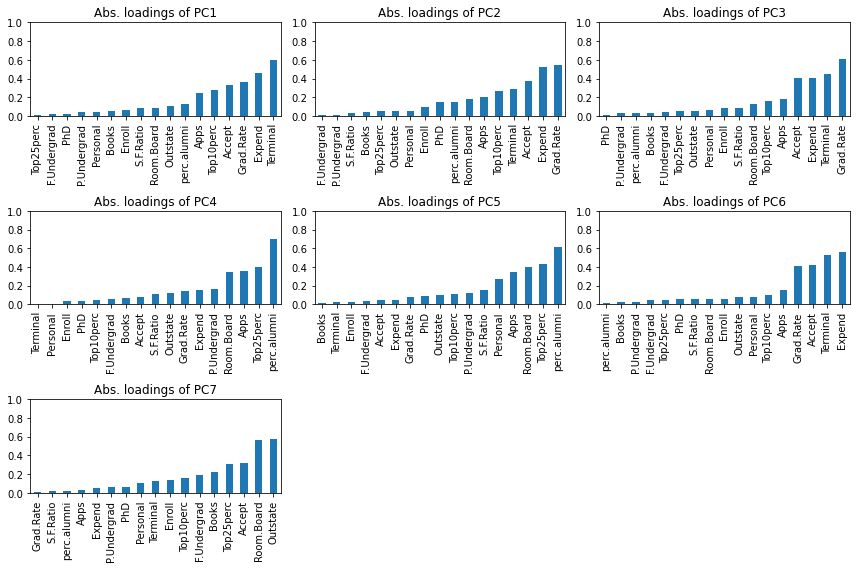

In [38]:
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,3,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = True).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()